In [31]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt


# Let’s run the extended SIR model

## Functions

In [32]:
# describe the model
def deriv(y, t, N, beta, k, delta):
    #TODO: check that every derivative is correct
    S, E, I, R, D, H = y                  #[susceptible, exposed, infected, recovered, deceased, hospital]
    dSdt = (-beta * S * I / N) + ((1/30)*R/N) #susceptible
    dEdt = beta * S * I / N - delta * E   #exposed
    dIdt = delta * E - k * I              #infected
    dHdt = 0.03 * I - k * H               #hospital
    dRdt = (1-d) * k * I                  #recovered
    dDdt = d * k * I                      #deceased

    return dSdt, dEdt, dIdt, dRdt, dDdt, dHdt

In [33]:
def plotsir(t, S, E, I, R, D, H):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, H, 'c', alpha=0.7, linewidth=2, label='In need of hospital')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'black', alpha=0.7, linewidth=2, label='Deceased')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

## Parameters and Plot

In [34]:
# describe the parameters
N =  10000000              # population
beta = 1.4                
delta = 1.0 / 10.0 # incubation period of 10 days
k=1/7
d=0.02             
S0, E0, I0, R0, D0, H0 = N-1, 1, 0, 0, 0, 0  # initial conditions: one exposed, rest susceptible

t = np.linspace(0, 149, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0, H0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, k, delta))
S, E, I, R, D, H = ret.T

plot the graph

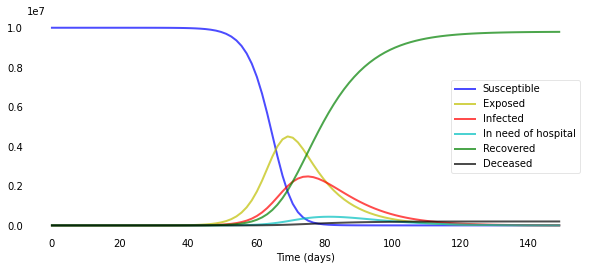

Deceased: 199800


In [37]:

plotsir(t, S, E, I, R, D, H)
print("Deceased:", int( round(D[-1], -2) ) ) 